In [1]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm 
import tarfile
import pickle
import numpy as np
import matplotlib.pyplot as plt

import skimage
import skimage.io
import skimage.transform

import tensorflow as tf
import tensornets as nets

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from keras.utils.data_utils import GeneratorEnqueuer
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import math, os

%matplotlib inline

Using TensorFlow backend.


In [3]:
image_path = "../tf-faster-rcnn/test/"

batch_size = 100
img_generator = ImageDataGenerator().flow_from_directory(image_path, shuffle=False, batch_size = batch_size)
n_rounds = math.ceil(img_generator.samples / img_generator.batch_size)
filenames = img_generator.filenames

img_generator = GeneratorEnqueuer(img_generator)
img_generator.start()
img_generator = img_generator.get()

Found 99999 images belonging to 1 classes.


In [4]:
CLASSES = ('background','person','bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')

(1, 683, 1024, 3)


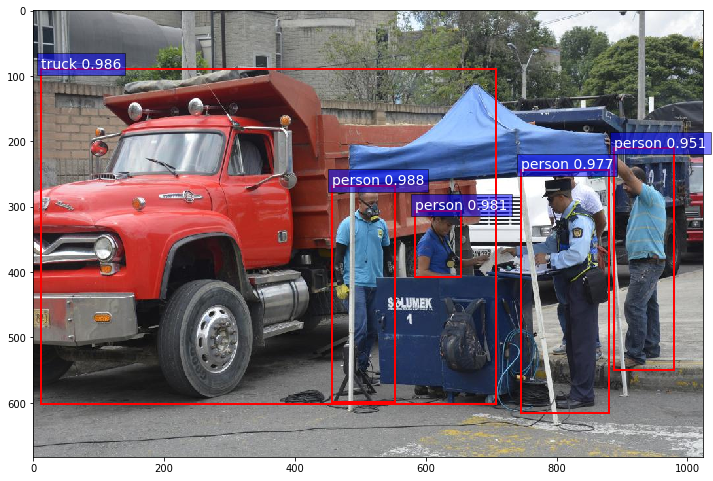

(1, 681, 1024, 3)


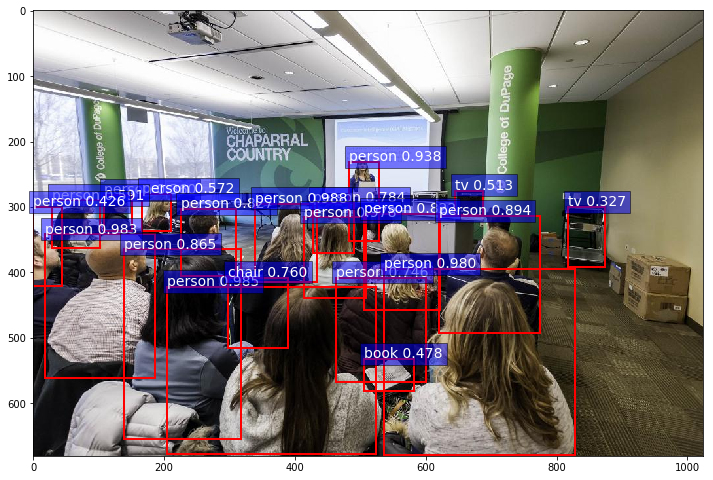

(1, 768, 1024, 3)


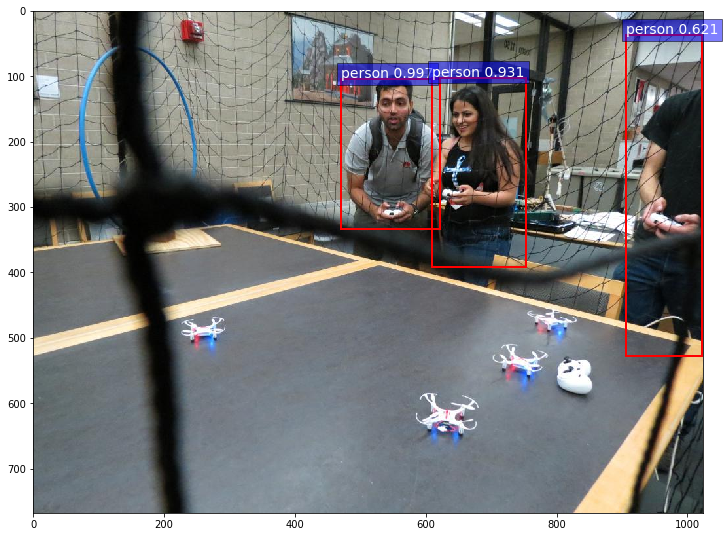

(1, 681, 1024, 3)


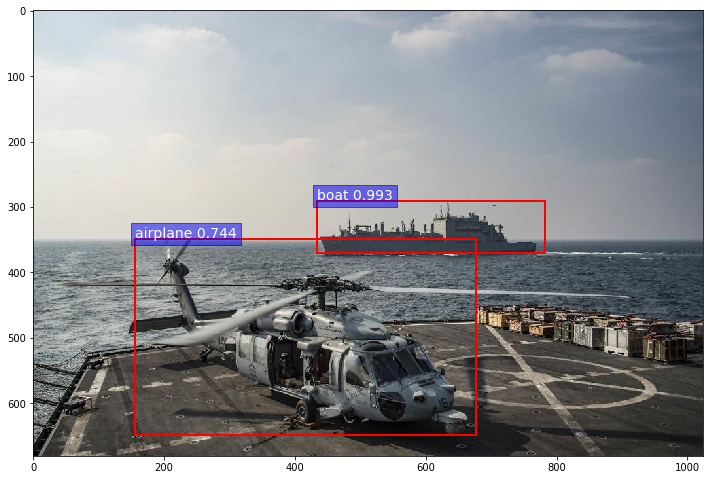

In [ ]:
import tensorflow as tf
import tensornets as nets
import pprint

inputs = tf.placeholder(tf.float32, [None, 416, 416, 3])
# model = nets.YOLOv2(inputs, nets.Darknet19)
model = nets.YOLOv3COCO(inputs, nets.Darknet19)
pp = pprint.PrettyPrinter(indent=4)

with tf.Session() as sess:
    sess.run(model.pretrained())

    for i in range(n_rounds):
        batch = next(img_generator)
        for j, prediction in enumerate(batch):
            image = filenames[i * batch_size + j]
            image = "../tf-faster-rcnn/test/" + image

            img = nets.utils.load_img(image)
            print(img.shape)
            
            preds = sess.run(model.preds, {inputs: model.preprocess(img)})
            boxes = model.get_boxes(preds, img.shape[1:3])
#             pp.pprint(boxes)
            
            box = boxes[6]
        
            fig, ax = plt.subplots(figsize=(12, 12))
            ax.imshow(img[0].astype(np.uint8))
            
            count = 0
            
            for box_category in boxes:
                count = count+1
                
                if len(box_category) > 0:
                    for box in box_category:
                        if box[4] > 0.3:
                            plt.gca().add_patch(plt.Rectangle(
                                (box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                fill=False, edgecolor='r', linewidth=2))

                            plt.text(box[0], box[1] - 2,
                                    '{:s} {:.3f}'.format(CLASSES[count], box[4]),
                                    bbox=dict(facecolor='blue', alpha=0.5),
                                    fontsize=14, color='white')                        
            plt.show()
            
        if i == 10:
            break